<a href="https://colab.research.google.com/github/hizafioramahardika/PCVK_Genap_2021/blob/main/Labassignment7ML_Hiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Work 1


Step 1 - Preparation

In [ ]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data
df = pd.read_csv('Iris.csv')

# Peek Data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Step 2 - Select Feature and Label

In [ ]:
# Select Features
X = df.iloc[:, 1:-1] # slice features vector
y = df.iloc[:, -1] # slice data labels

Step 3 - Visualize The Data

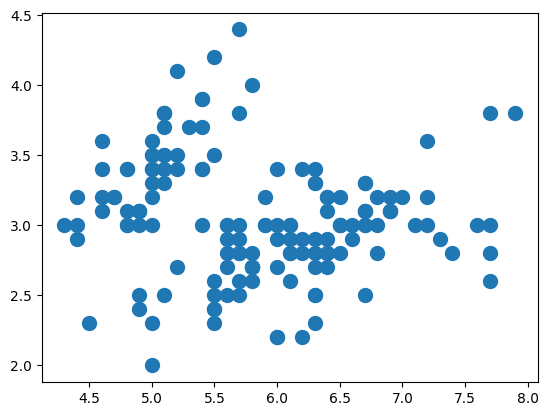

In [ ]:
# Plot Data
# We have 4 dimensional feature space
# Thereofe, we only plot the cluster based on Sepal Length and Sepal Width only

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Steo 4 - Make K-Means Model

In [ ]:
# Create K-Means Model
# In this model, we only just create a model with k = 2 even we already know the total of Iris dataset label is 3.

from sklearn.cluster import KMeans

# Instantiation K-Means Model
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Step 5 - Check Cluster

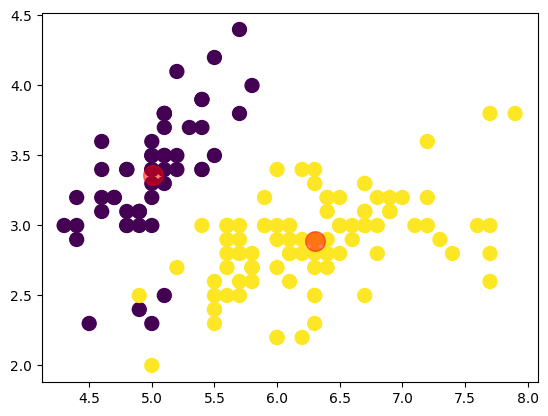

In [ ]:
# Plot cluster based on Sepal Length and Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Step 6 - Evaluate Model

In [ ]:
# Check the value of SSE
print(f'SSE: {cl_kmeans.inertia_}')

SSE: 152.36870647733906


Step 7 - Find The Optimum K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

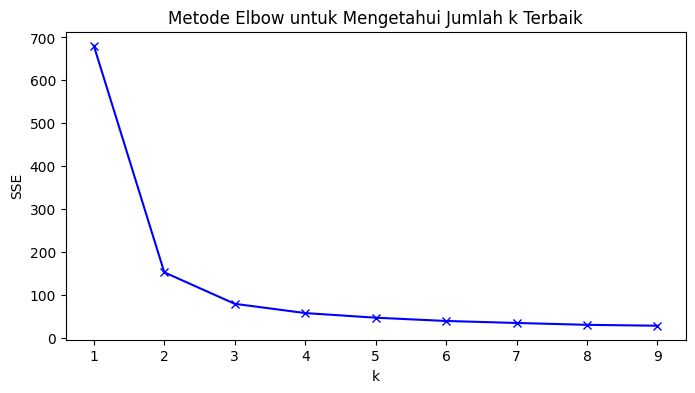

In [ ]:
# Implementasi Metode Elbow

# The of SSE's values
sse = []

# Limit finding the best k from 1-10
K = range(1,10)

# Calculate SSE for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Checj=k SSE Value for each

In [ ]:
# Check SSE value for each k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244000000001
k=2; SSE=152.36870647733906
k=3; SSE=78.940841426146
k=4; SSE=57.34540931571814
k=5; SSE=46.53558205128205
k=6; SSE=38.930963049671746
k=7; SSE=34.25476923565883
k=8; SSE=29.91463344988346
k=9; SSE=27.841073593073602


# Lab Work 2

Case 1 : Numerical Imgae

Step 1 - Load Data

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Step 2 - Make K-Means Model

In [ ]:
# Create K-Means model
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

Step 3 - Plot Digits CLuster

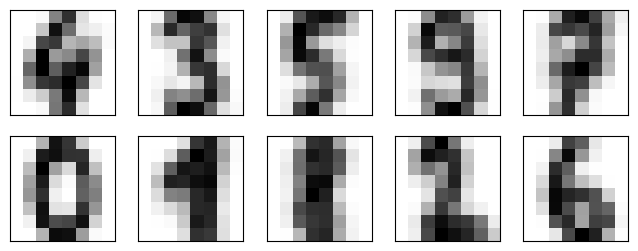

In [ ]:

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Step 4 - Labeling Based on The Cluster

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Step 5 - Evaluate Based Using Accuract Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Check the confusion matrix result

Text(113.9222222222222, 0.5, 'predicted label')

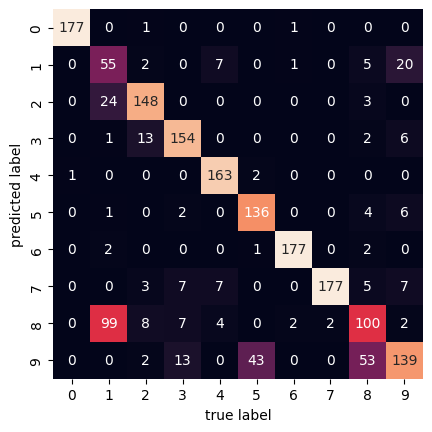

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Import Seaborn
import matplotlib.pyplot as plt

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')


# Case 2 : Image Compression

Step 1 - Load Data

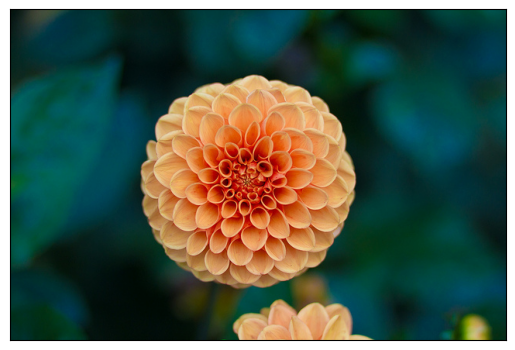

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

Check the image shape

In [ ]:
flower.shape

# Result,
# (427, 640, 3)

(427, 640, 3)

Step 2 - Normalize The Pixel Value

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Step 3 - Plot the Pixel Distribution

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Call the Function

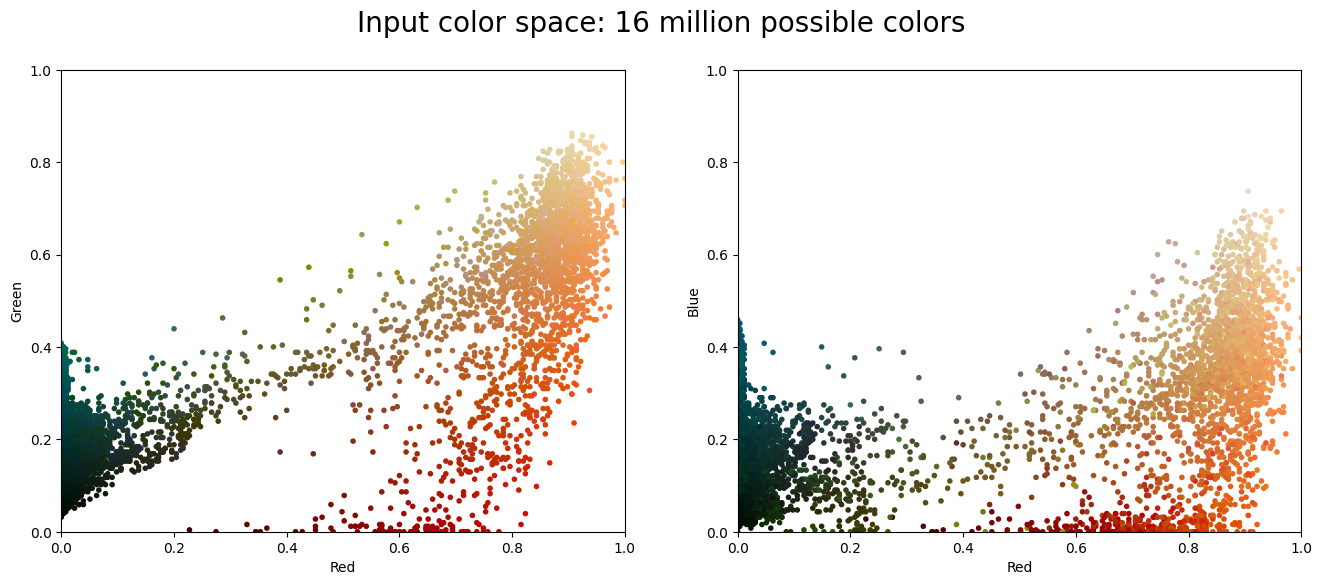

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Steo 4 - Make K-Means Model

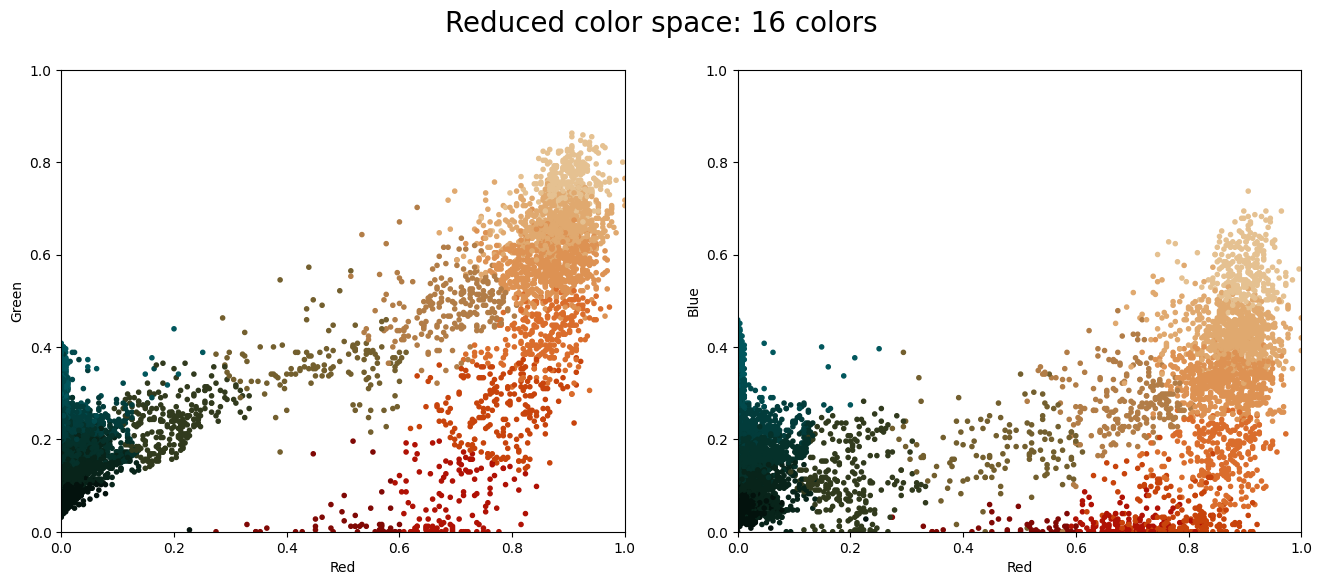

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Step 5 - Visualize the Result

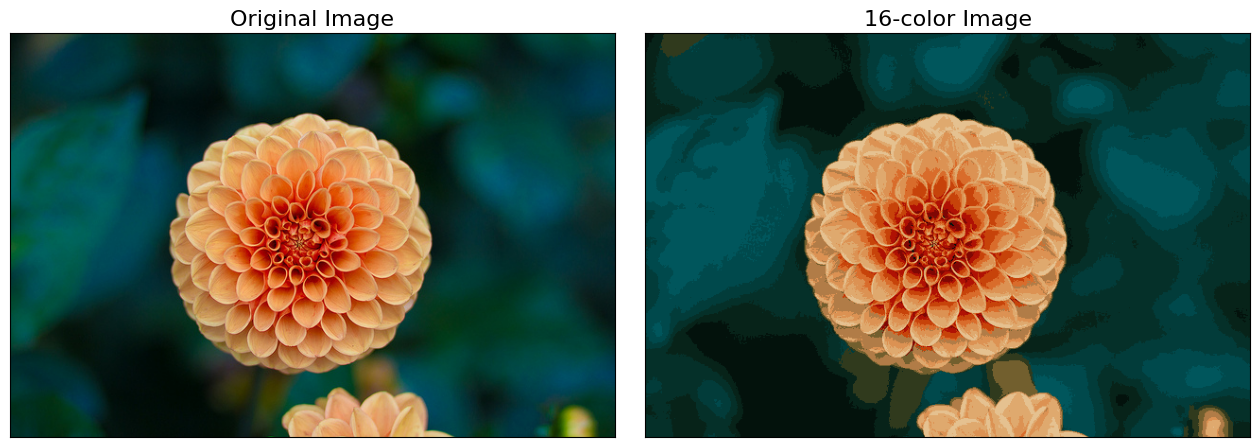

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Lab Work 3

Step 0 - Install Minison

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=0a0e05c2aa81558b1863985e230fa95111a42bb58be67ef88702d8985bdd1c54
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


Step 1 - Import Library

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Step 2 - Load iris Dataset

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Step 3 - Normalize Data

In [ ]:
# Normalize Data
data = data / data.max(axis=0)

Step 4 - Make SOM Model

In [ ]:
# Initiate SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Step 4.1 - Initiatie Random Weight for SOM

In [ ]:
# Initiate random weight
som.random_weights_init(data)

Step 4.2 - Fit Model

In [ ]:
# Fit SOM
num_epochs = 100
som.train_random(data, num_epochs)

Step 5 - Visualize SOM Network

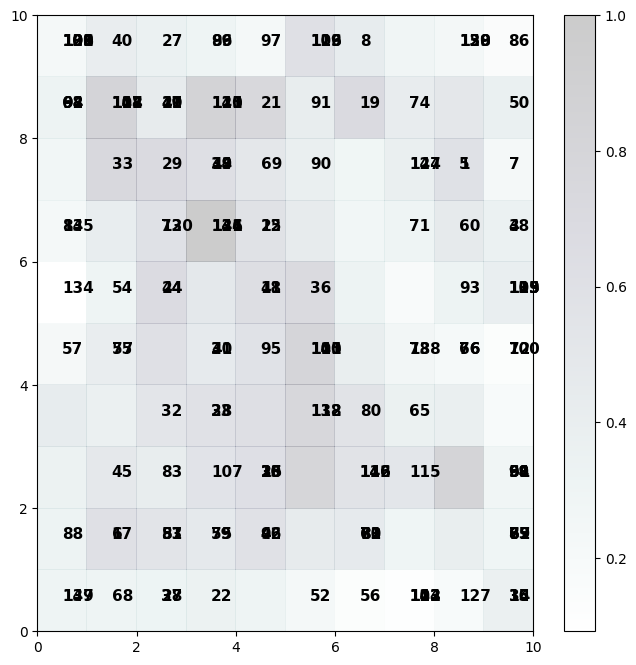

In [ ]:
# SOM Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

# Lab Assignment

# **Task**

Create a K-Means model with the following conditions:
1. Use the 'Mall_Customers.csv' data.
2. Determine the appropriate features for clustering (at least 2).
3. Create a K-Means model considering the best number of clusters.
4. Reimplement the model by using SOM.

Step 1 : Import the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler


Step 2 : Load and Preprocess Data

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


Step 3 : Find the Optimal Number of Clusters for K-Means

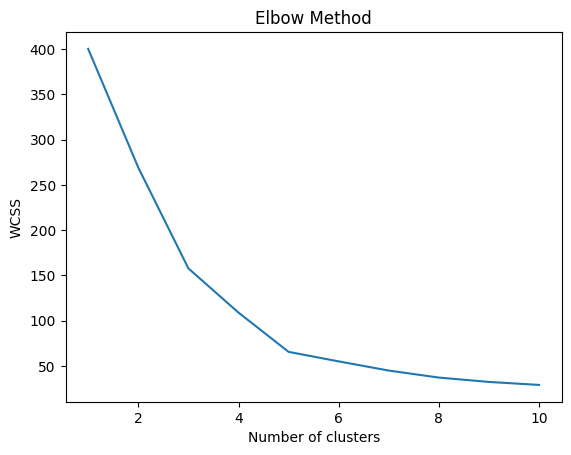

In [ ]:
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Step 4 : Train the K-Means Model

In [ ]:
k = 4  # Optimal number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_


Step 5 : Visualize K-means Clusters

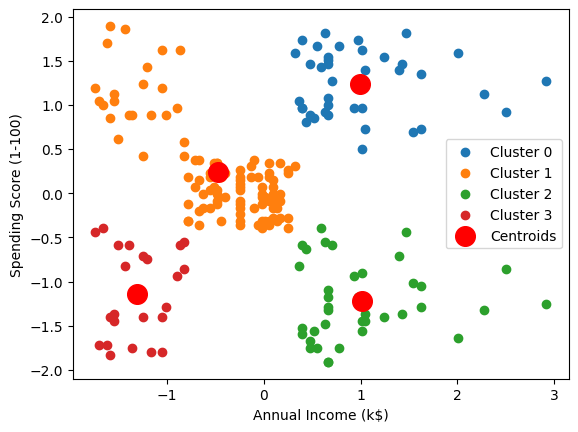

In [ ]:
for cluster in range(k):
    plt.scatter(X[data['Cluster'] == cluster][:, 0], X[data['Cluster'] == cluster][:, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Step 6 : Implement a Self-Organizing Map (SOM)

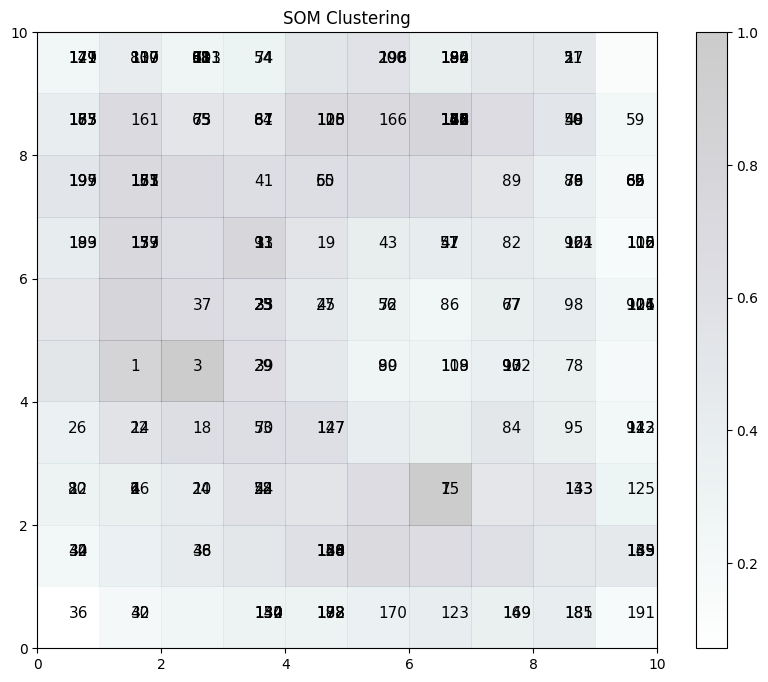

In [ ]:
#import library
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


# Load mall customer dataset
mall_customers_data = pd.read_csv("Mall_Customers.csv")

# Identify the numerical columns
numerical_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Normalize only the numerical columns
data = mall_customers_data[numerical_columns].values
data = data / data.max(axis=0)

# Make SOM model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=1.0, learning_rate=0.5)

# Correct the typos in your code (replace "random_weights_inti" with "random_weights_init" and "num_epochs" with "som_epochs")

som.random_weights_init(data)
som_epochs = 1000
som.train_batch(data, som_epochs)

# Create a scatter plot of SOM clusters
plt.figure(figsize=(10, 8))
for i, x in enumerate(data):
   w = som.winner(x)
   plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 2, 'size': 11})

plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)  # Plot the distance map
plt.colorbar()

plt.title('SOM Clustering')
plt.show()


